In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect

# Step 1 - Climate Analysis and Exploration

In [2]:


path = "sqlite:///Resources/hawaii.sqlite"
engine = create_engine(path)

#establish connection
conn = engine.connect()

In [3]:
inspector = inspect(engine)

tables = inspector.get_table_names()
tables

['measurement', 'station']

In [4]:
#for loop to see the 2 tables and the types

for table in tables:
    columns = inspector.get_columns(table)
    print(table)
    print()
    for column in columns:
        print(column["name"], column["type"])
    
    # or put it as a dataframe
    display(pd.DataFrame(columns))
    
    print()

measurement

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,date,TEXT,True,None,auto,0
3,prcp,FLOAT,True,None,auto,0
4,tobs,FLOAT,True,None,auto,0



station

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,name,TEXT,True,None,auto,0
3,latitude,FLOAT,True,None,auto,0
4,longitude,FLOAT,True,None,auto,0
5,elevation,FLOAT,True,None,auto,0


In [5]:
#see station top 10 rows , but only 9 rows total

query = """
        SELECT
            *
        FROM
            station
        LIMIT 10;
        """
pd.read_sql(query, conn)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [6]:
#see measurement top 10 rows

query = """
        SELECT
            *
        FROM
            measurement
        LIMIT 10;
        """
pd.read_sql(query, conn)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


# Precipitation Analysis

In [7]:
#Start by finding the most recent date in the data set.

In [8]:
query = """
        SELECT
          max(date)
        FROM
            measurement
        """

engine.execute(query).fetchall()

[('2017-08-23',)]

In [9]:
#Using this date, retrieve the last 12 months of precipitation data by querying the 12 preceding months of data. Note you do not pass in the date as a variable to your query.

In [10]:
# a year back from  2017-08-23 is 2016-08-23

query = """
        SELECT
          *
        FROM
            measurement
        where
            date >= '2016-08-23'
        LIMIT 10;
        """

engine.execute(query).fetchall()

[(2364, 'USC00519397', '2016-08-23', 0.0, 81.0),
 (2365, 'USC00519397', '2016-08-24', 0.08, 79.0),
 (2366, 'USC00519397', '2016-08-25', 0.08, 80.0),
 (2367, 'USC00519397', '2016-08-26', 0.0, 79.0),
 (2368, 'USC00519397', '2016-08-27', 0.0, 77.0),
 (2369, 'USC00519397', '2016-08-28', 0.01, 78.0),
 (2370, 'USC00519397', '2016-08-29', 0.0, 78.0),
 (2371, 'USC00519397', '2016-08-30', 0.0, 79.0),
 (2372, 'USC00519397', '2016-08-31', 0.13, 80.0),
 (2373, 'USC00519397', '2016-09-01', 0.0, 81.0)]

In [11]:
#Select only the date and prcp values
#Sort the DataFrame values by date

query = """
        SELECT
          date, prcp
        FROM
            measurement
        WHERE
            date >= '2016-08-23'
        ORDER BY
            date;
        """
df = pd.read_sql(query, conn)
df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [12]:
#Load the query results into a Pandas DataFrame and set the index to the date column.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2230 non-null   object 
 1   prcp    2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.0+ KB


In [14]:
#https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2230 non-null   datetime64[ns]
 1   prcp    2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.0 KB


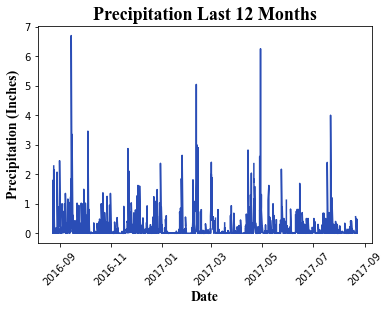

In [15]:
plt.plot(df["date"], df["prcp"], color = "#2A4DB6")
plt.xlabel("Date",fontsize = 14,fontweight = "bold", fontname="Times New Roman")
plt.ylabel("Precipitation (Inches)",fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title("Precipitation Last 12 Months",fontsize = 18, fontweight = "bold",fontname="Times New Roman")
plt.xticks(rotation=45)
plt.show()

In [16]:
#Use Pandas to print the summary statistics for the precipitation data.
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [17]:
#Design a query to calculate the total number of stations in the dataset.

In [18]:
query = """
        SELECT
          count(station)
        FROM
            station;
        
        """

engine.execute(query).fetchall()

[(9,)]

In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?).

#List the stations and observation counts in descending order.


In [20]:
query = """
        SELECT
            station.station,
            station.name,
            count(measurement.id) as observation
        FROM
            measurement
        JOIN 
            station ON measurement.station = station.station
        GROUP BY
            station.station,
            station.name
        ORDER BY
        --List the stations and observation counts in descending order.
            observation DESC;
        
        """
df2 = pd.read_sql(query, conn)
df2

,station,name,observation
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [21]:
# Which station id has the highest number of observations?
#ANSWER: USC00519281 with 2772 observations

In [22]:
# Using the most active station id, calculate the lowest, highest, and average temperature.
# Hint: You will need to use a function such as func.min, func.max, func.avg, and func.count in your queries.

In [23]:
query = """
        SELECT
            station as most_active_station,
            min(tobs) as lowest_temp,
            max(tobs) as highest_temp,
            avg(tobs) as average_temp
        FROM
            measurement
        WHERE
            station = 'USC00519281';
        """
df3 = pd.read_sql(query, conn)
df3

,most_active_station,lowest_temp,highest_temp,average_temp
0,USC00519281,54.0,85.0,71.663781


In [24]:
# Design a query to retrieve the last 12 months of temperature observation data (TOBS).


# Filter by the station with the highest number of observations. (USC00519281)


# Query the last 12 months of temperature observation data for this station.


# Plot the results as a histogram with bins=12.

In [25]:
query = """
        SELECT
            station,
            date,
            tobs
        FROM
            measurement
        WHERE
            --filter to station with highest number of obervation
            station = 'USC00519281'
        AND 
            --last 12 months of tobs
            date >= '2016-08-23'
        ORDER BY
            date ASC;
        """
df4 = pd.read_sql(query, conn)
df4.head()

,station,date,tobs
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0


In [26]:
df4["date"] = pd.to_datetime(df4["date"])
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  352 non-null    object        
 1   date     352 non-null    datetime64[ns]
 2   tobs     352 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 8.4+ KB


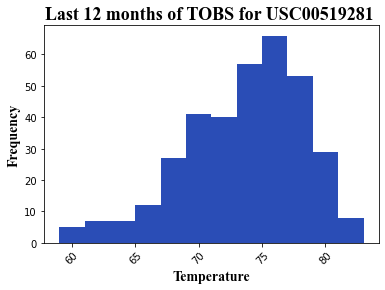

In [27]:
# Plot the results as a histogram with bins=12.
plt.hist(df4["tobs"], color = "#2A4DB6", bins=12)
plt.xlabel("Temperature",fontsize = 14,fontweight = "bold", fontname="Times New Roman")
plt.ylabel("Frequency",fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title("Last 12 months of TOBS for USC00519281 ",fontsize = 18, fontweight = "bold",fontname="Times New Roman")
plt.xticks(rotation=45)
plt.show()

In [31]:
conn.close()